Connected to .venv (Python 3.13.5)

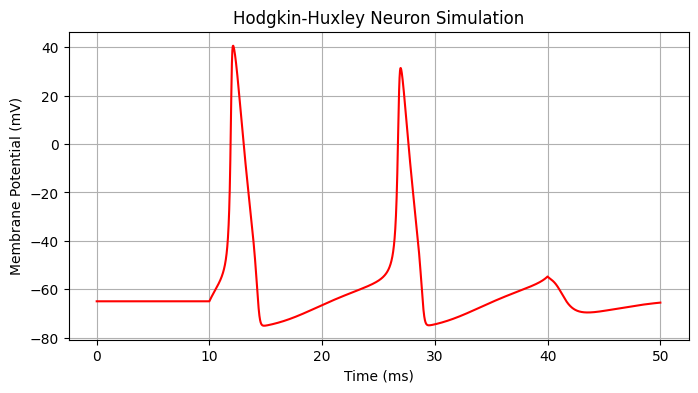

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C_m  = 1.0    # membrane capacitance, in uF/cm^2
g_Na = 120.0  # maximum conductances, mS/cm^2
g_K  = 36.0
g_L  = 0.3
E_Na = 50.0   # Nernst reversal potentials, mV
E_K  = -77.0
E_L  = -54.387

# Simulation parameters
dt = 0.01      # ms
t_max = 50.0   # ms
time = np.arange(0, t_max, dt)

# External current
I_ext = np.zeros(len(time))
I_ext[1000:4000] = 10  # Inject current between 10ms and 40ms

# Functions for gating variables
def alpha_m(V):
    return (0.1*(V+40)) / (1 - np.exp(-(V+40)/10))

def beta_m(V):
    return 4.0 * np.exp(-(V+65)/18)

def alpha_h(V):
    return 0.07 * np.exp(-(V+65)/20)

def beta_h(V):
    return 1.0 / (1 + np.exp(-(V+35)/10))

def alpha_n(V):
    return (0.01*(V+55)) / (1 - np.exp(-(V+55)/10))

def beta_n(V):
    return 0.125 * np.exp(-(V+65)/80)

# Initialize state variables
V = -65.0
m = alpha_m(V) / (alpha_m(V) + beta_m(V))
h = alpha_h(V) / (alpha_h(V) + beta_h(V))
n = alpha_n(V) / (alpha_n(V) + beta_n(V))

V_trace = np.zeros(len(time))

# Integration loop
for i in range(len(time)):
    # Calculate currents
    I_Na = g_Na * m**3 * h * (V - E_Na)
    I_K  = g_K * n**4 * (V - E_K)
    I_L  = g_L * (V - E_L)
    
    # Compute membrane potential change
    dV = (I_ext[i] - I_Na - I_K - I_L) / C_m
    V += dt * dV

    # Update gating variables
    m += dt * (alpha_m(V)*(1-m) - beta_m(V)*m)
    h += dt * (alpha_h(V)*(1-h) - beta_h(V)*h)
    n += dt * (alpha_n(V)*(1-n) - beta_n(V)*n)
    
    V_trace[i] = V

# Plot
plt.figure(figsize=(8,4))
plt.plot(time, V_trace, color='red')
plt.title('Hodgkin-Huxley Neuron Simulation')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.grid()
plt.show()